In [1]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects


In [2]:
# merra_2d = xr.open_mfdataset('G:\Data\Sitrang\MERRA2_400_tavg1_2d_aer_Nx_17102022_31102022\MERRA2_400.tavg1_2d_aer_Nx.*.nc4')
merra_2d  =xr.load_dataset('INDIA_MERRA2_14102022_31102022.nc4')

In [3]:
merra_2d

<xarray.Dataset>
Dimensions:    (lon: 63, lat: 77, time: 360)
Coordinates:
  * lon        (lon) float64 60.62 61.25 61.88 62.5 ... 97.5 98.12 98.75 99.38
  * lat        (lat) float64 0.5 1.0 1.5 2.0 2.5 ... 36.5 37.0 37.5 38.0 38.5
  * time       (time) datetime64[ns] 2022-10-17T00:30:00 ... 2022-10-31T23:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 1.489 1.493 1.497 ... 1.411 1.41 1.409
    BCCMASS    (time, lat, lon) float32 4.987e-07 4.673e-07 ... 2.423e-07
    BCEXTTAU   (time, lat, lon) float32 0.005588 0.005265 ... 0.002163 0.002297
    BCFLUXU    (time, lat, lon) float32 1.644e-06 1.502e-06 ... 4.381e-06
    BCFLUXV    (time, lat, lon) float32 3.89e-07 3.517e-07 ... -4.951e-07
    BCSCATAU   (time, lat, lon) float32 0.001617 0.001538 ... 0.000466 0.000492
    ...         ...
    SUFLUXU    (time, lat, lon) float32 9.922e-06 9.952e-06 ... 3.572e-05
    SUFLUXV    (time, lat, lon) float32 5.427e-06 5.457e-06 ... -5.386e-06
    SUSCATAU   (time, lat, lon) float32 0.02719 0.02703 ... 0.01293 0.01296
    TOTANGSTR  (time, lat, lon) float32 0.5692 0.565 0.5457 ... 0.7474 0.7261
    TOTEXTTAU  (time, lat, lon) float32 0.1406 0.1362 0.1318 ... 0.03769 0.03963
    TOTSCATAU  (time, lat, lon) float32 0.1347 0.1306 0.1266 ... 0.03465 0.03636
Attributes: (12/30)
    History:                           Original file generated: Mon Oct 31 17...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_aer_Nx.20221017.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/KLICLTZ8EM9D
    RangeBeginningDate:                2022-10-17
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2022-10-17
    RangeEndingTime:                   23:59:59.000000

In [ ]:
# np.where(np.logical_and(merra_2d.lat>0,merra_2d.lat<39))
merra_2d.lat[257]

In [ ]:
# merra2_ind = merra_2d.sel(lat=slice(0.5,38.5),lon=slice(60.625,99.375))

In [ ]:
# merra2_ind.to_netcdf('INDIA_MERRA2_14102022_31102022.nc4')

In [4]:
mean_total = ((merra_2d.TOTSCATAU[84,:,:]+merra_2d.TOTSCATAU[108,:,:]+merra_2d.TOTSCATAU[132,:,:]+merra_2d.TOTSCATAU[156,:,:]+merra_2d.TOTSCATAU[180,:,:]+merra_2d.TOTSCATAU[204,:,:]+merra_2d.TOTSCATAU[228,:,:])/7)

In [5]:
mean_bc_obc = ((merra_2d.BCSMASS[84,:,:]+merra_2d.OCSMASS[84,:,:]+merra_2d.DMSSMASS[84,:,:])+
                (merra_2d.BCSMASS[108,:,:]+merra_2d.OCSMASS[108,:,:]+merra_2d.DMSSMASS[108,:,:])+
                (merra_2d.BCSMASS[132,:,:]+merra_2d.OCSMASS[132,:,:]+merra_2d.DMSSMASS[132,:,:])+
                (merra_2d.BCSMASS[156,:,:]+merra_2d.OCSMASS[156,:,:]+merra_2d.DMSSMASS[156,:,:])+
                (merra_2d.BCSMASS[180,:,:]+merra_2d.OCSMASS[180,:,:]+merra_2d.DMSSMASS[180,:,:])+
                (merra_2d.BCSMASS[204,:,:]+merra_2d.OCSMASS[204,:,:]+merra_2d.DMSSMASS[204,:,:])+
                 (merra_2d.BCSMASS[228,:,:]+merra_2d.OCSMASS[228,:,:]+merra_2d.DMSSMASS[228,:,:]))/7

In [6]:
mean_ssdust= ((merra_2d.SSSMASS[84,:,:]+merra_2d.DUSMASS[84,:,:])+
             (merra_2d.SSSMASS[108,:,:]+merra_2d.DUSMASS[108,:,:])+
             (merra_2d.SSSMASS[132,:,:]+merra_2d.DUSMASS[132,:,:])+
             (merra_2d.SSSMASS[156,:,:]+merra_2d.DUSMASS[156,:,:])+
             (merra_2d.SSSMASS[180,:,:]+merra_2d.DUSMASS[180,:,:])+
            (merra_2d.SSSMASS[204,:,:]+merra_2d.DUSMASS[204,:,:])+
             (merra_2d.SSSMASS[228,:,:]+merra_2d.DUSMASS[228,:,:]))/7

In [7]:
merra_2d_daily = merra_2d.resample(time='D').mean()

In [ ]:
era1 = xr.open_mfdataset(r'G:\Data\Sitrang\adaptor.mars.internal-1671097215.5577831-22736-4-5f7232ba-253b-40ec-b9e2-8b061c5bb13e.nc')
era2 = xr.open_mfdataset(r'G:\Data\Sitrang\adaptor.mars.internal-1671099283.515841-17203-6-aa607fb9-8bd2-4224-891a-c63d03e3800e.nc')
era1_1 = era1.sel(time=slice('2022-10-14', '2022-10-22'))
era2_1 = era2.sel(time=slice('2022-10-23', '2022-10-31'))
era = xr.concat([era1_1,era2_1], dim="time")

In [ ]:
era

In [ ]:
era_ind = era.sel(latitude=slice(38.75,0.25),longitude=slice(60.25,101.75))

In [ ]:
# np.where(np.logical_and(era.longitude>60,era.longitude<102))
era_ind.to_netcdf('INDIA_ERA5_14102022_31102022.nc4')

In [ ]:
era_ind

In [8]:
era=xr.load_dataset('INDIA_ERA5_14102022_31102022.nc4')

In [9]:
era_daily = era.resample(time='D').mean()

In [ ]:
era_daily#.to_netcdf('ERA5_daily_')

In [ ]:
merra_2d_daily

In [110]:

#from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import matplotlib.patheffects as path_effects
import sys as s
import os 
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as path_effects
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.io.shapereader as shpreader
import warnings
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings('ignore')

#import os
#os.getcwd()
#os.chdir(r'D:\New_Life\Notebooks

In [11]:
obc=(np.array(merra_2d_daily.BCSMASS)+np.array(merra_2d_daily.OCSMASS)+np.array(merra_2d_daily.DMSSMASS))

In [12]:
# merra_2d_daily.time[3]

In [13]:
ssdust = np.array(merra_2d_daily.SSSMASS) + np.array(merra_2d_daily.DUSMASS)

In [ ]:
10

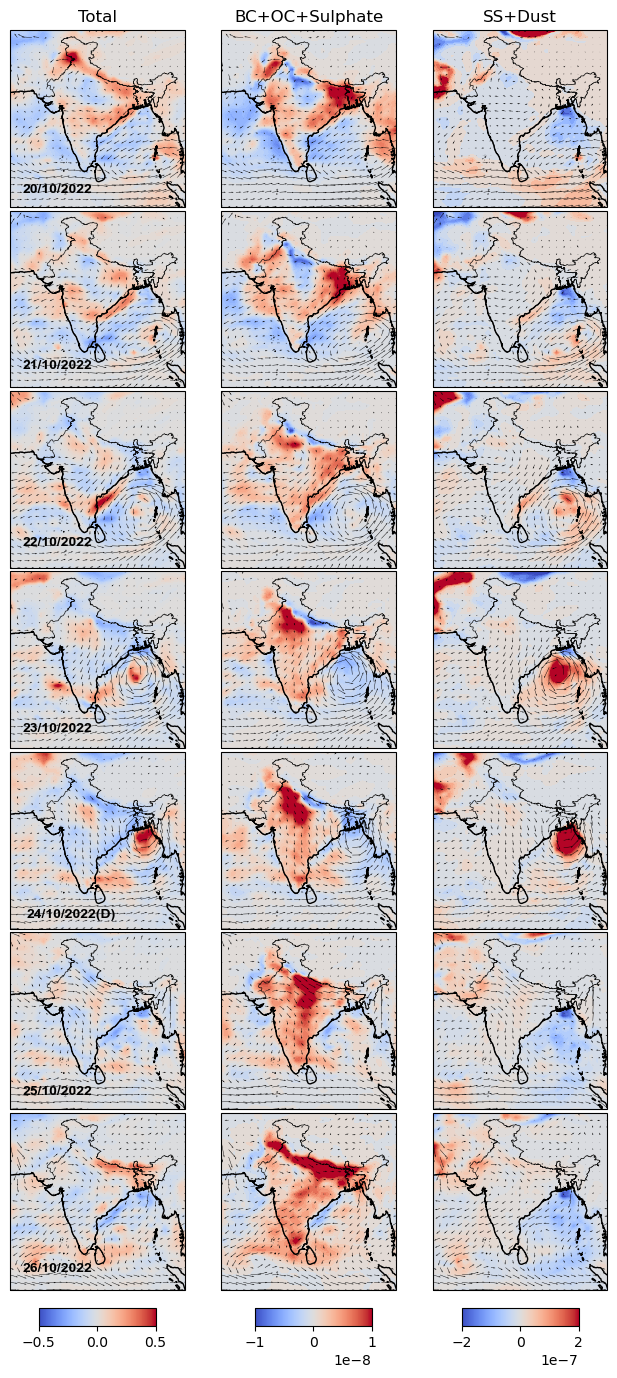

In [120]:
fname= r'F:\Indian Shape Files\Indian Administrative bourders\IND_adm\IND_adm1.shp'
adm1_shapes = list(shpreader.Reader(fname).geometries())
fname2 = r'F:\Indian Shape Files\Only Indian Boundaries\India_Boundary\India_Boundary.shp'
adm1_shapes2 = list(shpreader.Reader(fname2).geometries())


fig=plt.figure(figsize=(9,18))#,constrained_layout=True)
ax = fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.02, hspace=0.02)


def main():
#***************Total******************************
    ax1 = plt.subplot(8,3, 1, projection=ccrs.PlateCarree())   
    ax1.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    ax1.set_title('Total')
    filled_c = ax1.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[3,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5, vmax=0.5,cmap='coolwarm')
    ax1.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[6,5,:,:]),np.array(era_daily.v[6,5,:,:]),regrid_shape=25)#
#                 scale=100,scale_units='xy')
    ax1.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax1.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax1.text(0.27, 0.1, '20/10/2022', horizontalalignment='center', verticalalignment='center',
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
    
    ax2 = plt.subplot(8,3, 4, projection=ccrs.PlateCarree())   
    ax2.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax2.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[4,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5, vmax=0.5,cmap='coolwarm')
    ax2.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[7,5,:,:]),np.array(era_daily.v[7,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax2.coastlines('50m')
    #     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax2.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax2.text(0.27, -0.9, '21/10/2022', horizontalalignment='center', verticalalignment='center', 
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
    
    
    ax3 = plt.subplot(8,3, 7, projection=ccrs.PlateCarree())   
    ax3.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax3.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[5,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5, vmax=0.5,cmap='coolwarm')
    ax3.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[8,5,:,:]),np.array(era_daily.v[8,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax3.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax3.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax3.text(0.27, -1.9, '22/10/2022', horizontalalignment='center', verticalalignment='center',
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
    ax4 = plt.subplot(8,3, 10, projection=ccrs.PlateCarree())   
    ax4.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax4.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[6,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5, vmax=0.5,cmap='coolwarm')
    ax4.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[9,5,:,:]),np.array(era_daily.v[9,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax4.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax4.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax4.text(0.27, -2.95, '23/10/2022', horizontalalignment='center', verticalalignment='center', 
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
    
    ax5 = plt.subplot(8,3, 13, projection=ccrs.PlateCarree())   
    ax5.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax5.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[7,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5, vmax=0.5,cmap='coolwarm')
    ax5.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[10,5,:,:]),np.array(era_daily.v[10,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax5.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax5.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax5.text(0.35, -4, '24/10/2022(D)', horizontalalignment='center', verticalalignment='center',
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
    
    ax6 = plt.subplot(8,3, 16, projection=ccrs.PlateCarree())   
    ax6.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax6.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[8,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5, vmax=0.5,cmap='coolwarm')
    ax6.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[11,5,:,:]),np.array(era_daily.v[11,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax6.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax6.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax6.text(0.27, -5, '25/10/2022', horizontalalignment='center', verticalalignment='center', 
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
    ax7 = plt.subplot(8,3, 19, projection=ccrs.PlateCarree())   
    ax7.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax7.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (merra_2d_daily.TOTSCATAU[9,:,:]-mean_total),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.5,vmax=0.5,cmap='coolwarm')
    ax7.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[12,5,:,:]),np.array(era_daily.v[12,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax7.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax7.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax7.text(0.27, -6, '26/10/2022', horizontalalignment='center', verticalalignment='center',
             fontweight="bold", size=10,family= 'Arial',transform=ax1.transAxes)
    
#****************************BC+OC+Sulphate********************************    
    
    ax8 = plt.subplot(8,3, 2, projection=ccrs.PlateCarree())   
    ax8.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())   
    ax8.set_title('BC+OC+Sulphate')
    filled_c = ax8.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[3,:,:]-mean_bc_obc),
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax8.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[6,5,:,:]),np.array(era_daily.v[6,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax8.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax8.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax9 = plt.subplot(8,3, 5, projection=ccrs.PlateCarree())   
    ax9.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax9.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[4,:,:]-mean_bc_obc), 
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax9.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[7,5,:,:]),np.array(era_daily.v[7,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax9.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax9.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax10 = plt.subplot(8,3, 8, projection=ccrs.PlateCarree())   
    ax10.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax10.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[5,:,:]-mean_bc_obc),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax10.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[8,5,:,:]),np.array(era_daily.v[8,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax10.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax10.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #

    
    ax11 = plt.subplot(8,3, 11, projection=ccrs.PlateCarree())   
    ax11.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax11.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[6,:,:]-mean_bc_obc),
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax11.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[9,5,:,:]),np.array(era_daily.v[9,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax11.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax11.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    
    
    ax12 = plt.subplot(8,3, 14, projection=ccrs.PlateCarree())   
    ax12.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax12.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[7,:,:]-mean_bc_obc), 
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax12.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[10,5,:,:]),np.array(era_daily.v[10,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax12.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax12.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax13 = plt.subplot(8,3, 17, projection=ccrs.PlateCarree())   
    ax13.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax13.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[8,:,:]-mean_bc_obc), 
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax13.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[11,5,:,:]),np.array(era_daily.v[11,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax13.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax13.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax14 = plt.subplot(8,3, 20, projection=ccrs.PlateCarree())   
    ax14.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax14.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(obc[9,:,:]-mean_bc_obc), 
                            60, transform=ccrs.PlateCarree(),vmin=-0.00000001,vmax=0.00000001,cmap='coolwarm')
    ax14.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[12,5,:,:]),np.array(era_daily.v[12,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax14.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax14.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
#*****************************SS+Dust*************************************
    ax15 = plt.subplot(8,3, 3, projection=ccrs.PlateCarree())   
    ax15.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())  
    ax15.set_title('SS+Dust')
    filled_c = ax15.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (ssdust[3,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax15.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[6,5,:,:]),np.array(era_daily.v[6,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax15.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax15.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax16 = plt.subplot(8,3, 6, projection=ccrs.PlateCarree())   
    ax16.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax16.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (ssdust[4,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax16.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[7,5,:,:]),np.array(era_daily.v[7,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax16.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax16.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax17 = plt.subplot(8,3, 9, projection=ccrs.PlateCarree())   
    ax17.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax17.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (ssdust[5,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax17.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[8,5,:,:]),np.array(era_daily.v[8,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax17.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax17.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #

    
    ax18 = plt.subplot(8,3, 12, projection=ccrs.PlateCarree())   
    ax18.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax18.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (ssdust[6,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax18.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[9,5,:,:]),np.array(era_daily.v[9,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax18.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax18.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    
    
    ax19 = plt.subplot(8,3, 15, projection=ccrs.PlateCarree())   
    ax19.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax19.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (ssdust[7,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax19.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[10,5,:,:]),np.array(era_daily.v[10,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax19.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax19.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax20 = plt.subplot(8,3, 18, projection=ccrs.PlateCarree())   
    ax20.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax20.contourf(merra_2d_daily.lon, merra_2d_daily.lat, (ssdust[8,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax20.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[11,5,:,:]),np.array(era_daily.v[11,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax20.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax20.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    
    ax21 = plt.subplot(8,3, 21, projection=ccrs.PlateCarree())   
    ax21.set_extent([61.5,99,38.5,0.5], ccrs.PlateCarree())    
    filled_c = ax21.contourf(merra_2d_daily.lon, merra_2d_daily.lat, np.array(ssdust[9,:,:]-mean_ssdust),  
                            60, transform=ccrs.PlateCarree(),vmin=-0.0000002,vmax=0.0000002,cmap='coolwarm')
    ax21.quiver(era_daily.longitude,era_daily.latitude,np.array(era_daily.u[12,5,:,:]),np.array(era_daily.v[12,5,:,:]),regrid_shape=25)#,
#                 scale=100,scale_units='xy')
    ax21.coastlines('50m')
#     ax1.add_geometries(adm1_shapes, ccrs.PlateCarree(),
#                   edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    ax21.add_geometries(adm1_shapes2, ccrs.PlateCarree(),
                  edgecolor='black', alpha=0.9,lw = 0.5, facecolor='none') #
    

# Create the axis for the colorbars
    ax22 = fig.add_axes([0.15,   #= >away from x axis
                         0.18,   #= position up and down
                         0.13,   #= width of cbar
                         0.01])
    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    cmap = mpl.cm.coolwarm
    norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)
    # Create an empty ScalarMappable to set the colorbar's colormap and norm.
    # The following gives a basic continuous colorbar with ticks and labels.
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=ax22, orientation='horizontal')#, label='Some Units')
    ax23 = fig.add_axes([0.39, 0.18, 0.13, 0.01])
    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    norm = mpl.colors.Normalize(vmin=-0.00000001, vmax=0.00000001)
    # Create an empty ScalarMappable to set the colorbar's colormap and norm.
    # The following gives a basic continuous colorbar with ticks and labels.
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=ax23, orientation='horizontal')#, label='Some Units')
    ax24 = fig.add_axes([0.62, 0.18, 0.13, 0.01])
    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    norm = mpl.colors.Normalize(vmin=-0.0000002, vmax=0.0000002)
    # Create an empty ScalarMappable to set the colorbar's colormap and norm.
    # The following gives a basic continuous colorbar with ticks and labels.
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=ax24, orientation='horizontal')#, label='Some Units')
    

#     fig.colorbar(filled_c, ax=ax21, location='bottom')
    
if __name__ == '__main__':
    main()
plt.savefig('total_OBC_SS_DUST.jpg',bbox_inches='tight',dpi=720)